In [1]:
%load_ext autoreload
%autoreload 2

In [28]:
import logging

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import utils
from utils.scipy import stats

In [35]:
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)
logging.captureWarnings(True) 

{'x': array([ 0.47368421,  1.42105263,  2.36842105,  3.31578947,  4.26315789,
        5.21052632,  6.15789474,  7.10526316,  8.05263158,  9.        ,
        9.94736842, 10.89473684, 11.84210526, 12.78947368, 13.73684211,
       14.68421053, 15.63157895, 16.57894737, 17.52631579]), 'y': array([-0.02483391, -0.02385025, -0.02297934,  0.07983182,  0.04710875,
        0.18704234,  0.23699609,  0.16106167, -0.10048819, -0.03751441,
       -0.06907517, -0.04437484, -0.01897021, -0.0144578 , -0.01182249,
       -0.00875172,  0.01631689, -0.03583062,  0.0905159 ]), 'yerr': array([1.73901121e-02, 1.99544949e-02, 1.04693946e-02, 2.45190713e-03,
       7.50451674e-03, 7.24711488e-03, 2.78662461e-03, 1.07779130e-02,
       2.43755926e-02, 1.26869700e-03, 2.87758243e-03, 1.50247308e-03,
       2.68936340e-02, 1.12960248e-02, 1.16083609e-02, 3.41452238e-02,
       4.77857667e-04, 1.68785800e-02, 9.59226806e-05])}


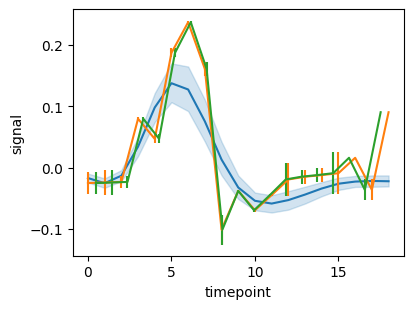

In [39]:
df = sns.load_dataset('fmri')
signal_err = np.abs(np.random.normal(size=len(df['signal'])))
signal_err[np.arange(100)] = np.nan
df['signal_err'] = signal_err
# print(df['timepoint'])
sns.lineplot(df, x='timepoint', y='signal')
utils.plot.lineplot(df, x='timepoint', y='signal', yerr='signal_err', weighted=True)

result = stats.binned_mean(df['timepoint'], df['signal'], df['signal_err'], bins=len(df['timepoint'].unique()), weighted=True)
print(result)
plt.errorbar(**result)
plt.show()